# Equity Analysis with Python - Introduction (Part 1)

__Please install yfinance__ with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance

## yfinance API - first steps

In [122]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [123]:
symbol = "AAPL" # ticker symbol for Apple Inc.

In [124]:
df = yf.download(tickers = symbol)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


In [125]:
df.index = pd.to_datetime(df.index.date)
df

,Open,High,Low,Close,Adj Close,Volume
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400


In [126]:
df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
               '2023-09-22', '2023-09-25', '2023-09-26', '2023-09-27',
               '2023-09-28', '2023-09-29'],
              dtype='datetime64[ns]', length=10790, freq=None)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10790 entries, 1980-12-12 to 2023-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10790 non-null  float64
 1   High       10790 non-null  float64
 2   Low        10790 non-null  float64
 3   Close      10790 non-null  float64
 4   Adj Close  10790 non-null  float64
 5   Volume     10790 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 590.1 KB


- __Date__: Date (year-month-day) at midnight New York Time (business daily data without weekends and bank holidays)
- __Open__: daily Open Price @ 9:30 am Eastern TimeZone
- __High__: daily high/max price
- __Low__: daily low/min price
- __Close__: daily Close Price @ 4:00 pm Eastern TimeZone
- __Adj Close__: Close price adjusted for Dividend Payments (backward adjusted)
- __Volume__: daily Trading Volume (number of Shares)

__Price Chart__

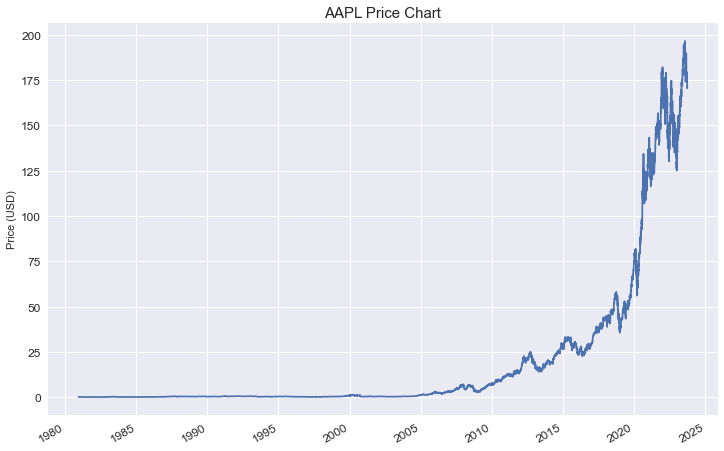

In [128]:
df.Close.plot(figsize = (12, 8), fontsize = 12)
plt.ylabel("Price (USD)")
plt.title("AAPL Price Chart", fontsize = 15)
plt.show()

__Volume Chart__

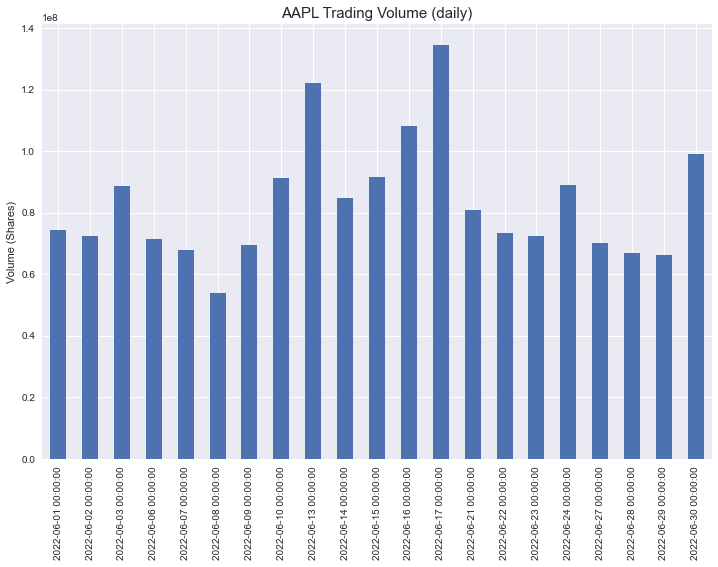

In [129]:
df.loc["2022-6", "Volume"].plot(figsize = (12, 8), kind = "bar")
plt.ylabel("Volume (Shares)")
plt.title("AAPL Trading Volume (daily)", fontsize = 15)
plt.show()

In [130]:
df.Volume.mul(df.Close) # Trading Volume (USD Value)

1980-12-12    6.019952e+07
1980-12-15    2.139674e+07
1980-12-16    1.191798e+07
1980-12-17    9.985128e+06
1980-12-18    8.730367e+06
                  ...     
2023-09-25    8.130089e+09
2023-09-26    1.110671e+10
2023-09-27    1.140548e+10
2023-09-28    9.608891e+09
2023-09-29    8.871110e+09
Length: 10790, dtype: float64

## Excursus: Versions and Updates

You can get the __latest version__ of yfinance with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance --upgrade

In [13]:
yf.__version__

'0.2.30'

In [131]:
yf.download(tickers = symbol)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


## Analysis Period

In [132]:
df

,Open,High,Low,Close,Adj Close,Volume
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400


In [133]:
df.loc["2022-01-01":"2022-01-15"]

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904068,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171814,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100
2022-01-10,169.080002,172.500000,168.169998,172.190002,170.469116,106765600
2022-01-11,172.320007,175.179993,170.820007,175.080002,173.330231,76138300
2022-01-12,176.119995,177.179993,174.820007,175.529999,173.775742,74805200
2022-01-13,175.779999,176.619995,171.789993,172.190002,170.469116,84505800
2022-01-14,171.339996,173.779999,171.089996,173.070007,171.340347,80440800


In [134]:
df.loc["2022"]

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904068,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171814,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700


In [135]:
df.loc["2017":]

,Open,High,Low,Close,Adj Close,Volume
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.059307,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.029020,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.166471,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.469334,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.720938,134247600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400


In [136]:
df = yf.download(tickers = symbol, start = "2020-07-01", end = "2020-12-31")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,91.279999,91.839996,90.977501,91.027496,89.250435,110737200
2020-07-02,91.962502,92.617500,90.910004,91.027496,89.250435,114041600
2020-07-06,92.500000,93.945000,92.467499,93.462502,91.637886,118655600
2020-07-07,93.852501,94.654999,93.057503,93.172501,91.353561,112424400
2020-07-08,94.180000,95.375000,94.089996,95.342499,93.481194,117092000
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.856796,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.850586,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.494766,124486200


Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

In [137]:
df = yf.download(tickers = symbol, period = "1mo", interval = "1h") # last 30 days
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-30 09:30:00-04:00,184.940002,187.669998,184.740005,186.184998,186.184998,19124821
2023-08-30 10:30:00-04:00,186.190002,186.800003,186.130005,186.630005,186.630005,6789360
2023-08-30 11:30:00-04:00,186.630005,187.490005,186.610001,187.429993,187.429993,5270270
2023-08-30 12:30:00-04:00,187.440002,187.770004,187.199997,187.290100,187.290100,4476042
2023-08-30 13:30:00-04:00,187.300003,187.589996,186.649994,186.850006,186.850006,5268054
...,...,...,...,...,...,...
2023-09-29 11:30:00-04:00,172.059998,172.089996,171.530106,171.835007,171.835007,3810317
2023-09-29 12:30:00-04:00,171.839996,171.929993,170.729996,171.229996,171.229996,3723090
2023-09-29 13:30:00-04:00,171.229996,171.300003,170.380005,170.539993,170.539993,3930145


In [138]:
df = yf.download(tickers = symbol, period = "1y") # last 365 days 
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-30,141.279999,143.100006,138.000000,138.199997,137.384979,124925300
2022-10-03,138.210007,143.070007,137.690002,142.449997,141.609924,114311700
2022-10-04,145.029999,146.220001,144.259995,146.100006,145.238403,87830100
2022-10-05,144.070007,147.380005,143.009995,146.399994,145.536621,79471000
2022-10-06,145.809998,147.539993,145.220001,145.429993,144.572342,68402200
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


In [139]:
df = yf.download(tickers = symbol, period = "ytd") # year-to-date 
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


In [140]:
df = yf.download(tickers = symbol, period = "max") # max
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


## Data Frequency

Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo <br>
(Intraday data cannot extend last 60 days)

__daily (default)__

In [141]:
df = yf.download(tickers = symbol, interval = "1d")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


__monthly__

In [142]:
df = yf.download(tickers = symbol, interval = "1mo")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-01,0.130022,0.138951,0.124442,0.129464,0.100314,6366416000
1985-02-01,0.129464,0.137277,0.110491,0.110491,0.085613,4733388800
1985-03-01,0.110491,0.116071,0.092634,0.098772,0.076533,4615587200
1985-04-01,0.098772,0.102679,0.087612,0.094866,0.073506,2868028800
1985-05-01,0.094866,0.099330,0.075335,0.077567,0.060102,4639129600
...,...,...,...,...,...,...
2023-05-01,169.279999,179.350006,164.309998,177.250000,176.766464,1275155500
2023-06-01,177.699997,194.479996,176.929993,193.970001,193.708420,1297101100
2023-07-01,193.779999,198.229996,186.600006,196.449997,196.185074,996066400


__weekly__

In [143]:
df = yf.download(tickers = symbol, interval = "1wk")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-08,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.126674,0.112723,0.126116,0.097720,490134400
1980-12-22,0.132254,0.159040,0.132254,0.158482,0.122799,187891200
1980-12-29,0.160714,0.161272,0.152344,0.154018,0.119340,219452800
1981-01-05,0.151228,0.151228,0.135045,0.142299,0.110259,197904000
...,...,...,...,...,...,...
2023-08-28,180.089996,189.919998,178.550003,189.460007,189.460007,264165600
2023-09-04,188.279999,189.979996,173.539993,178.179993,178.179993,305075900
2023-09-11,180.070007,180.300003,173.580002,175.009995,175.009995,403692100


__intraday - 1h__

In [144]:
df = yf.download(tickers = symbol, interval = "1h")
df

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL']: Exception('%ticker%: 1h data not available for startTime=345479400 and endTime=1696179839. The requested range must be within the last 730 days.')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [145]:
df = yf.download(tickers = symbol, period = "1y", interval = "1h")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-09-30 09:30:00-04:00,141.680801,142.630005,140.610001,142.220001,142.220001,24991973
2022-09-30 10:30:00-04:00,142.220001,143.100006,141.854996,142.618805,142.618805,14145376
2022-09-30 11:30:00-04:00,142.620300,142.740005,140.850006,141.289993,141.289993,10494221
2022-09-30 12:30:00-04:00,141.289993,141.759995,140.690002,141.059998,141.059998,7803895
2022-09-30 13:30:00-04:00,141.065002,141.159897,140.160004,140.440399,140.440399,9339217
...,...,...,...,...,...,...
2023-09-29 11:30:00-04:00,172.059998,172.089996,171.530106,171.835007,171.835007,3810317
2023-09-29 12:30:00-04:00,171.839996,171.929993,170.729996,171.229996,171.229996,3723090
2023-09-29 13:30:00-04:00,171.229996,171.300003,170.380005,170.539993,170.539993,3930145


__intraday - 1m__

In [146]:
df = yf.download(tickers = symbol, period = "1y", interval = "1m")
df

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL']: Exception('%ticker%: 1m data not available for startTime=1664643853 and endTime=1696179853. Only 7 days worth of 1m granularity data are allowed to be fetched per request.')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [147]:
df = yf.download(tickers = symbol, period = "1wk", interval = "1m")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-09-25 09:30:00-04:00,174.199997,175.139999,174.149994,174.986893,174.986893,1940081
2023-09-25 09:31:00-04:00,174.971802,174.971802,174.500000,174.610001,174.610001,238946
2023-09-25 09:32:00-04:00,174.600006,174.744995,174.509995,174.726700,174.726700,240872
2023-09-25 09:33:00-04:00,174.699997,174.699997,174.250000,174.338699,174.338699,192563
2023-09-25 09:34:00-04:00,174.350006,174.554703,174.320007,174.548798,174.548798,132896
...,...,...,...,...,...,...
2023-09-29 15:55:00-04:00,171.479996,171.479996,170.854996,170.968903,170.968903,426173
2023-09-29 15:56:00-04:00,170.960007,170.990005,170.759995,170.970001,170.970001,430618
2023-09-29 15:57:00-04:00,170.962006,171.250000,170.962006,171.229996,171.229996,457885


## Dividends

__Dividend__: A dividend is a __distribution of profits__ by a corporation to its shareholders.

Companies are __free__ to distribute (all / parts / none) of their profits to shareholders (Dividend Payout Policy) 

Dividend Payouts are an import __source of income__ for equity investors.

__Total Return/Profit__ of stocks consists of:
- Stock Price Increase
- Dividend Payouts

- For __innovative & high-growth__ companies, __Stock Price Increase__ is relatively more important.
- For __mature & highly profitable__ companies, __Dividend Payouts__ can be a significant part of Total Return/Profit.

-> __Don´t omit Dividend Payouts__ in your Analysis / Performance Comparison! (otherwise, high-dividend stocks get penalized!)

__For this and the next lectures, you have the choice between__
- option 1: working with the same data as in the videos (saved in the csv file aapl.csv) __RECOMMENDED!!!__
- option 2: working with your specific maximum time period

In [148]:
# option 1 -> same data as in video
df = pd.read_csv("aapl.csv", index_col = "Date", parse_dates = ["Date"]) # for more information, see lecture "Saving and Loading Data (Local Files)"  
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


In [ ]:
# option 2 -> max period
# df = yf.download(tickers = symbol, actions = True) 
# df

In [149]:
df.loc[df.Dividends != 0]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-05-11,0.343750,0.354911,0.342634,0.343750,0.268340,197276800,0.000536,0.0
1987-08-10,0.430804,0.430804,0.408482,0.430804,0.336732,77996800,0.000536,0.0
1987-11-17,0.328125,0.330357,0.312500,0.312500,0.244794,268800000,0.000714,0.0
1988-02-12,0.362723,0.370536,0.361607,0.366071,0.287323,137760000,0.000714,0.0
1988-05-16,0.361607,0.369420,0.357143,0.368304,0.289648,74760000,0.000714,0.0
...,...,...,...,...,...,...,...,...
2021-08-06,146.350006,147.110001,145.630005,146.139999,145.325668,54126800,0.220000,0.0
2021-11-05,151.889999,152.199997,150.059998,151.279999,150.656570,65463900,0.220000,0.0
2022-02-04,171.679993,174.100006,170.679993,172.389999,171.898315,82465400,0.220000,0.0


In [150]:
df.Dividends.sum() # cumulative Dividends per share

6.603564

In [151]:
df.Close[-1] - df.Close[0] # cumulative Stock Price Increase

147.1416562795639

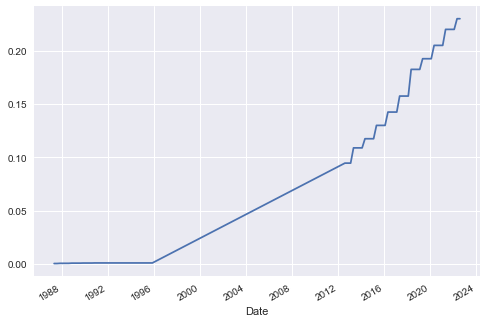

In [152]:
df.loc[df.Dividends != 0].Dividends.plot()
plt.show()

-> AAPL Dividend Policy: 
- historically __low-dividend__ stock (focus on growth) 
- Dividend Payouts __smoothed and steadily growing__ (highly predictable)
- __Avoiding Dividend Cuts__ in less profitable years (negative signal in the market)

## What´s the Adjusted Close Price?

"The Adjusted Close Price is the backward adjusted (reduced) Close Price (adjusted for Dividends)."   

In [153]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


In [154]:
df2 = df[["Close", "Adj Close", "Dividends"]].copy()
df2

,Close,Adj Close,Dividends
Date,,,
1980-12-12,0.128348,0.100039,0.0
1980-12-15,0.121652,0.094820,0.0
1980-12-16,0.112723,0.087861,0.0
1980-12-17,0.115513,0.090035,0.0
1980-12-18,0.118862,0.092646,0.0
...,...,...,...
2022-10-17,142.410004,142.410004,0.0
2022-10-18,143.750000,143.750000,0.0
2022-10-19,143.860001,143.860001,0.0


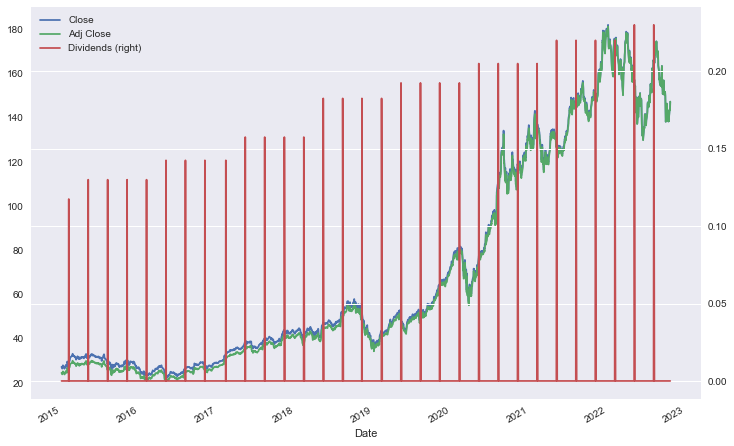

In [155]:
df2.loc["2015":].plot(figsize = (12, 8),secondary_y = "Dividends" )
plt.show()

In [156]:
df2[df2.Dividends > 0]

,Close,Adj Close,Dividends
Date,,,
1987-05-11,0.343750,0.268340,0.000536
1987-08-10,0.430804,0.336732,0.000536
1987-11-17,0.312500,0.244794,0.000714
1988-02-12,0.366071,0.287323,0.000714
1988-05-16,0.368304,0.289648,0.000714
...,...,...,...
2021-08-06,146.139999,145.325668,0.220000
2021-11-05,151.279999,150.656570,0.220000
2022-02-04,172.389999,171.898315,0.220000


In [157]:
last_div = df2.loc["2022-08-01": "2022-08-5"].copy()
last_div

,Close,Adj Close,Dividends
Date,,,
2022-08-01,161.509995,161.285965,0.00
2022-08-02,160.009995,159.788040,0.00
2022-08-03,166.130005,165.899567,0.00
2022-08-04,165.809998,165.580002,0.00
2022-08-05,165.350006,165.350006,0.23


In [158]:
last_div.Close - last_div["Adj Close"]

Date
2022-08-01    0.224030
2022-08-02    0.221954
2022-08-03    0.230438
2022-08-04    0.229996
2022-08-05    0.000000
dtype: float64

https://in.help.yahoo.com/kb/adjusted-close-sln28256.html

In [159]:
multiplier = (1 - 0.23/165.809998)
multiplier

0.9986128701358528

In [160]:
last_div

,Close,Adj Close,Dividends
Date,,,
2022-08-01,161.509995,161.285965,0.00
2022-08-02,160.009995,159.788040,0.00
2022-08-03,166.130005,165.899567,0.00
2022-08-04,165.809998,165.580002,0.00
2022-08-05,165.350006,165.350006,0.23


In [161]:
last_div["Adj Close calc"] = last_div.Close * multiplier
last_div

,Close,Adj Close,Dividends,Adj Close calc
Date,,,,
2022-08-01,161.509995,161.285965,0.00,161.285959
2022-08-02,160.009995,159.788040,0.00,159.788040
2022-08-03,166.130005,165.899567,0.00,165.899561
2022-08-04,165.809998,165.580002,0.00,165.579998
2022-08-05,165.350006,165.350006,0.23,165.120644


In [162]:
df["Adj Close"] / df["Close"] # total multiplier (all dividends)

Date
1980-12-12    0.779439
1980-12-15    0.779440
1980-12-16    0.779439
1980-12-17    0.779440
1980-12-18    0.779439
                ...   
2022-10-17    1.000000
2022-10-18    1.000000
2022-10-19    1.000000
2022-10-20    1.000000
2022-10-21    1.000000
Length: 10555, dtype: float64

In [163]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


__Interpretations:__
- Borrowing parts (e.g. 22%) of initial stock purchase price in 1980 and pay back borrowed amounts with Dividends. -or-
- Reinvesting Dividends and buying more shares with Dividends

__Benefits:__
- good approximation for a Stock´s __Total Return__ (Price Return + Dividend Yield)
- allows __Performance Comparison__ across stocks with different Payout Policies

## Stock Splits

In [164]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


All Prices (OHLC, Adj Close) and Dividends are __backward adjusted__ (reduced) for Stock Splits. 

-> This __makes perfectly sense__ and you should not question it (unless you are interested in historical observable prices)!

In [166]:
splits = df.loc[df["Stock Splits"] > 0]
splits

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-06-16,0.370536,0.372768,0.339286,0.370536,0.289250,342720000,0.0,2.0
2000-06-21,0.901786,1.016741,0.898438,0.993304,0.848115,490000000,0.0,2.0
2005-02-28,1.595714,1.612143,1.570000,1.602143,1.367960,651610400,0.0,2.0
2014-06-09,23.174999,23.469999,22.937500,23.424999,20.925592,301660000,0.0,7.0
2020-08-31,127.580002,131.000000,126.000000,129.039993,127.500870,225702700,0.0,4.0


__Stock Split__: allows a company to break (split) each share into multiple shares __without affecting its market capitalization (total value of all its shares) or each investor's stake__ in the company. Motivation: reduce price per share and increase granularity.

__Example Stock Split 4:1__ -> Receive 4 new shares for 1 old share. Share Price immediately drops to 1/4 (no value effect)

On Yahoo Finance, Prices & Dividends are backward adjusted for Stock Splits. 

Price on 2020-08-31 __after Split__:

In [167]:
splits.loc["2020-08-31", "Close"] 

129.0399932861328

Price on 2020-08-31 __before Split__:

In [168]:
splits.loc["2020-08-31", "Close"] * splits.loc["2020-08-31", "Stock Splits"]

516.1599731445312

__-> 4 * 129 == 1 * 516__

__Calculate the unadjusted (observable) prices__

In [169]:
df["Stock Splits"].replace(to_replace = 0, value = 1, inplace = True) # 1:1 on all other days
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0


In [170]:
df["Multiplier"] = df.sort_index(ascending = False)["Stock Splits"].cumprod() # cumulative multipier
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0
...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0


In [171]:
df["Close_unadj"] = df["Close"] * df.Multiplier # observable close price
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier,Close_unadj
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0,28.749950
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0,27.250048
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0,25.249952
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0,25.874911
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0,26.625089
...,...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0,142.410004
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0,143.750000
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0,143.860001


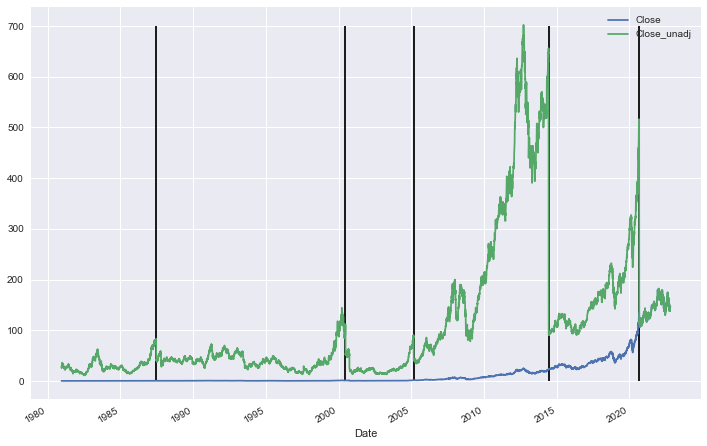

In [172]:
df[["Close", "Close_unadj"]].plot(figsize = (12 ,8))
plt.vlines(splits.index, 0, 700, color = "black")
plt.show()

__-> (backward adjusted) prices correctly reflect true price performance. They ignore price drops caused by stock splits!__

__unadjusted Dividends__

In [173]:
df["div_unadj"] = df["Dividends"] * df.Multiplier

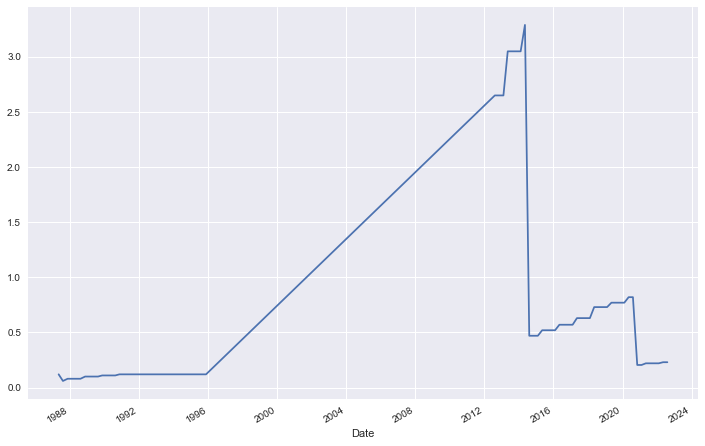

In [174]:
df.loc[df.div_unadj != 0].div_unadj.plot(figsize = (12, 8))
plt.show()

__unadjusted Trading Volume (number of shares)__

In [175]:
df["Volume_unadj"] = df["Volume"] / df.Multiplier

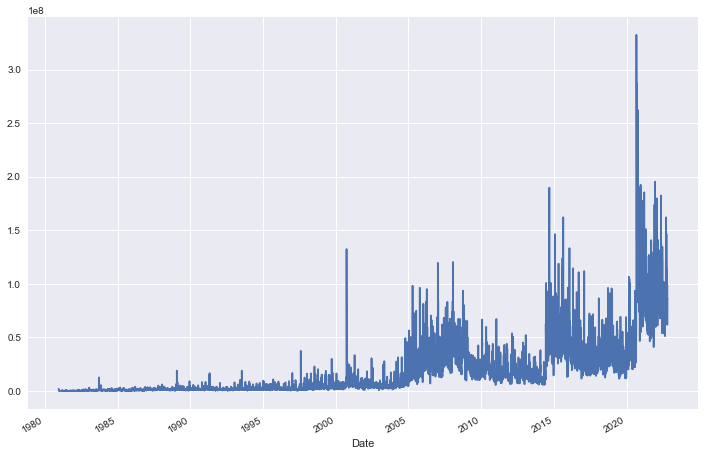

In [176]:
df["Volume_unadj"].plot(figsize = (12, 8))
plt.show()

## Stocks from other Countries / Exchanges 

In [89]:
yf.download(tickers = "AAPL") # US Ticker (no suffix)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


In [90]:
yf.download(tickers = "RELIANCE") # Indian Ticker (no suffix)

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RELIANCE']: Exception('%ticker%: No timezone found, symbol may be delisted')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


__Exchange List:__ 

https://help.yahoo.com/kb/SLN2310.html

In [91]:
yf.download(tickers = "RELIANCE.NS") # Indian Ticker

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.441110,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.359914,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.438570,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.342152,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.271106,76935930
...,...,...,...,...,...,...
2023-09-25,2350.399902,2360.699951,2335.100098,2340.449951,2340.449951,7127442
2023-09-26,2338.550049,2350.199951,2335.600098,2342.500000,2342.500000,5043891
2023-09-27,2343.500000,2371.800049,2338.500000,2368.899902,2368.899902,5861389


In [92]:
yf.download(tickers = "LHA.DE") # German Ticker (Deutsche Boerse XETRA)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-16,10.6451,10.7729,10.3588,10.4559,7.052275,761200
1996-12-17,10.4048,10.6809,10.3281,10.6707,7.197152,751400
1996-12-18,10.6860,10.9365,10.5480,10.5991,7.148860,950800
1996-12-19,10.5582,10.7780,10.5582,10.7167,7.228178,424300
1996-12-20,10.7116,10.8394,10.4815,10.5326,7.104006,544900
...,...,...,...,...,...,...
2023-09-25,8.1000,8.1140,7.5770,7.6600,7.660000,11730695
2023-09-26,7.6130,7.7150,7.5670,7.6070,7.607000,4774311
2023-09-27,7.6000,7.6870,7.5550,7.6530,7.653000,3748238


In [93]:
yf.download(tickers = "LHA.F") # German Ticker (Frankfurt Stock Exchange)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,24.100,24.700001,23.100000,23.100000,16.736544,316400
2000-01-04,23.100,23.400000,22.400000,23.000000,16.664095,487300
2000-01-05,22.250,22.850000,21.799999,22.450001,16.265606,362100
2000-01-06,22.500,23.950001,22.299999,23.799999,17.243713,231100
2000-01-07,23.500,23.950001,23.100000,23.900000,17.316166,273900
...,...,...,...,...,...,...
2023-09-25,8.051,8.118000,7.583000,7.736000,7.736000,71430
2023-09-26,7.685,7.700000,7.570000,7.618000,7.618000,25220
2023-09-27,7.580,7.669000,7.570000,7.669000,7.669000,5759


## Multiple Tickers

In [94]:
df = yf.download(tickers = ["AAPL", "MSFT"]) # multiple tickers
df

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.099450         NaN    0.128348         NaN    0.128906   
1980-12-15    0.094261         NaN    0.121652         NaN    0.122210   
1980-12-16    0.087343         NaN    0.112723         NaN    0.113281   
1980-12-17    0.089504         NaN    0.115513         NaN    0.116071   
1980-12-18    0.092099         NaN    0.118862         NaN    0.119420   
...                ...         ...         ...         ...         ...   
2023-09-25  176.080002  317.540009  176.080002  317.540009  176.970001   
2023-09-26  171.960007  312.140015  171.960007  312.140015  175.199997   
2023-09-27  170.429993  312.790009  170.429993  312.790009  173.039993   
2023-09-28  170.690002  313.640015  170.690002  313.640015  172.029999   
2023-09-29  171.210007  315.750000  171.210007  315.750000  173.070007   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
1980-12-12         NaN    0.128348         NaN    0.128348         NaN   
1980-12-15         NaN    0.121652         NaN    0.122210         NaN   
1980-12-16         NaN    0.112723         NaN    0.113281         NaN   
1980-12-17         NaN    0.115513         NaN    0.115513         NaN   
1980-12-18         NaN    0.118862         NaN    0.118862         NaN   
...                ...         ...         ...         ...         ...   
2023-09-25  317.670013  174.149994  315.000000  174.199997  316.589996   
2023-09-26  315.880005  171.660004  310.019989  174.820007  315.130005   
2023-09-27  314.299988  169.050003  309.690002  172.619995  312.299988   
2023-09-28  315.480011  167.619995  309.450012  169.339996  310.989990   
2023-09-29  319.470001  170.339996  314.980011  172.020004  317.750000   

               Volume              
                 AAPL        MSFT  
Date                               
1980-12-12  469033600         NaN  
1980-12-15  175884800         NaN  
1980-12-16  105728000         NaN  
1980-12-17   86441600         NaN  
1980-12-18   73449600         NaN  
...               ...         ...  
2023-09-25   46172700  17836000.0  
2023-09-26   64588900  26297600.0  
2023-09-27   66921800  19410100.0  
2023-09-28   56294400  19683600.0  
2023-09-29   51814200  24140300.0  

[10790 rows x 12 columns]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10790 entries, 1980-12-12 to 2023-09-29
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  10790 non-null  float64
 1   (Adj Close, MSFT)  9464 non-null   float64
 2   (Close, AAPL)      10790 non-null  float64
 3   (Close, MSFT)      9464 non-null   float64
 4   (High, AAPL)       10790 non-null  float64
 5   (High, MSFT)       9464 non-null   float64
 6   (Low, AAPL)        10790 non-null  float64
 7   (Low, MSFT)        9464 non-null   float64
 8   (Open, AAPL)       10790 non-null  float64
 9   (Open, MSFT)       9464 non-null   float64
 10  (Volume, AAPL)     10790 non-null  int64  
 11  (Volume, MSFT)     9464 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


In [96]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT')],
           )

In [97]:
df.Close # outer index level

,AAPL,MSFT
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,NaN
1980-12-16,0.112723,NaN
1980-12-17,0.115513,NaN
1980-12-18,0.118862,NaN
...,...,...
2023-09-25,176.080002,317.540009
2023-09-26,171.960007,312.140015
2023-09-27,170.429993,312.790009


In [98]:
df.loc[:, ("Close", "MSFT")] # one specific column

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2023-09-25    317.540009
2023-09-26    312.140015
2023-09-27    312.790009
2023-09-28    313.640015
2023-09-29    315.750000
Name: (Close, MSFT), Length: 10790, dtype: float64

In [99]:
df.Close.MSFT # one specific column

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2023-09-25    317.540009
2023-09-26    312.140015
2023-09-27    312.790009
2023-09-28    313.640015
2023-09-29    315.750000
Name: MSFT, Length: 10790, dtype: float64

In [100]:
df.loc[:, (slice(None), slice("AAPL"))] # inner index level

,Adj Close,Close,High,Low,Open,Volume
,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12,0.099450,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.094261,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16,0.087343,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17,0.089504,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.092099,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2023-09-25,176.080002,176.080002,176.970001,174.149994,174.199997,46172700
2023-09-26,171.960007,171.960007,175.199997,171.660004,174.820007,64588900


In [101]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

AAPL                                                  \
             Adj Close       Close        High         Low        Open   
Date                                                                     
1980-12-12    0.099450    0.128348    0.128906    0.128348    0.128348   
1980-12-15    0.094261    0.121652    0.122210    0.121652    0.122210   
1980-12-16    0.087343    0.112723    0.113281    0.112723    0.113281   
1980-12-17    0.089504    0.115513    0.116071    0.115513    0.115513   
1980-12-18    0.092099    0.118862    0.119420    0.118862    0.118862   
...                ...         ...         ...         ...         ...   
2023-09-25  176.080002  176.080002  176.970001  174.149994  174.199997   
2023-09-26  171.960007  171.960007  175.199997  171.660004  174.820007   
2023-09-27  170.429993  170.429993  173.039993  169.050003  172.619995   
2023-09-28  170.690002  170.690002  172.029999  167.619995  169.339996   
2023-09-29  171.210007  171.210007  173.070007  170.339996  172.020004   

                             MSFT                                      \
               Volume   Adj Close       Close        High         Low   
Date                                                                    
1980-12-12  469033600         NaN         NaN         NaN         NaN   
1980-12-15  175884800         NaN         NaN         NaN         NaN   
1980-12-16  105728000         NaN         NaN         NaN         NaN   
1980-12-17   86441600         NaN         NaN         NaN         NaN   
1980-12-18   73449600         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2023-09-25   46172700  317.540009  317.540009  317.670013  315.000000   
2023-09-26   64588900  312.140015  312.140015  315.880005  310.019989   
2023-09-27   66921800  312.790009  312.790009  314.299988  309.690002   
2023-09-28   56294400  313.640015  313.640015  315.480011  309.450012   
2023-09-29   51814200  315.750000  315.750000  319.470001  314.980011   

                                    
                  Open      Volume  
Date                                
1980-12-12         NaN         NaN  
1980-12-15         NaN         NaN  
1980-12-16         NaN         NaN  
1980-12-17         NaN         NaN  
1980-12-18         NaN         NaN  
...                ...         ...  
2023-09-25  316.589996  17836000.0  
2023-09-26  315.130005  26297600.0  
2023-09-27  312.299988  19410100.0  
2023-09-28  310.989990  19683600.0  
2023-09-29  317.750000  24140300.0  

[10790 rows x 12 columns]

In [102]:
df.AAPL

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-12,0.099450,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.094261,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16,0.087343,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17,0.089504,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.092099,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2023-09-25,176.080002,176.080002,176.970001,174.149994,174.199997,46172700
2023-09-26,171.960007,171.960007,175.199997,171.660004,174.820007,64588900
2023-09-27,170.429993,170.429993,173.039993,169.050003,172.619995,66921800


In [103]:
df = yf.download(tickers = ["LHA.F", "LHA.DE"]).Close
df

[*********************100%%**********************]  2 of 2 completed


,LHA.DE,LHA.F
Date,,
1996-12-16,10.4559,NaN
1996-12-17,10.6707,NaN
1996-12-18,10.5991,NaN
1996-12-19,10.7167,NaN
1996-12-20,10.5326,NaN
...,...,...
2023-09-25,7.6600,7.736
2023-09-26,7.6070,7.618
2023-09-27,7.6530,7.669


In [104]:
df.LHA.F # incorrect

AttributeError: 'DataFrame' object has no attribute 'LHA'

In [105]:
df["LHA.F"]

Date
1996-12-16      NaN
1996-12-17      NaN
1996-12-18      NaN
1996-12-19      NaN
1996-12-20      NaN
              ...  
2023-09-25    7.736
2023-09-26    7.618
2023-09-27    7.669
2023-09-28    7.570
2023-09-29    7.511
Name: LHA.F, Length: 6868, dtype: float64

In [ ]:
df.columns = ["LHA_DE", "LHA_F"]

In [106]:
df

,LHA.DE,LHA.F
Date,,
1996-12-16,10.4559,NaN
1996-12-17,10.6707,NaN
1996-12-18,10.5991,NaN
1996-12-19,10.7167,NaN
1996-12-20,10.5326,NaN
...,...,...
2023-09-25,7.6600,7.736
2023-09-26,7.6070,7.618
2023-09-27,7.6530,7.669


In [107]:
df.LHA_F

AttributeError: 'DataFrame' object has no attribute 'LHA_F'

## Saving and Loading Data (Local Files)

In [177]:
import yfinance as yf
import pandas as pd

In [178]:
symbol = "AAPL"

In [179]:
df = yf.download(symbol)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


In [181]:
df.to_csv(path_or_buf = "apple.csv") # writing to local csv

In [182]:
df2 = pd.read_csv("apple.csv", index_col="Date", parse_dates= ["Date"]) # loading from local csv
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


In [ ]:
df2.info()

__multiple symbols__

In [183]:
symbols = ["AAPL", "MSFT"]

In [184]:
df = yf.download(symbols)
df

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.099450         NaN    0.128348         NaN    0.128906   
1980-12-15    0.094261         NaN    0.121652         NaN    0.122210   
1980-12-16    0.087343         NaN    0.112723         NaN    0.113281   
1980-12-17    0.089504         NaN    0.115513         NaN    0.116071   
1980-12-18    0.092099         NaN    0.118862         NaN    0.119420   
...                ...         ...         ...         ...         ...   
2023-09-25  176.080002  317.540009  176.080002  317.540009  176.970001   
2023-09-26  171.960007  312.140015  171.960007  312.140015  175.199997   
2023-09-27  170.429993  312.790009  170.429993  312.790009  173.039993   
2023-09-28  170.690002  313.640015  170.690002  313.640015  172.029999   
2023-09-29  171.210007  315.750000  171.210007  315.750000  173.070007   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
1980-12-12         NaN    0.128348         NaN    0.128348         NaN   
1980-12-15         NaN    0.121652         NaN    0.122210         NaN   
1980-12-16         NaN    0.112723         NaN    0.113281         NaN   
1980-12-17         NaN    0.115513         NaN    0.115513         NaN   
1980-12-18         NaN    0.118862         NaN    0.118862         NaN   
...                ...         ...         ...         ...         ...   
2023-09-25  317.670013  174.149994  315.000000  174.199997  316.589996   
2023-09-26  315.880005  171.660004  310.019989  174.820007  315.130005   
2023-09-27  314.299988  169.050003  309.690002  172.619995  312.299988   
2023-09-28  315.480011  167.619995  309.450012  169.339996  310.989990   
2023-09-29  319.470001  170.339996  314.980011  172.020004  317.750000   

               Volume              
                 AAPL        MSFT  
Date                               
1980-12-12  469033600         NaN  
1980-12-15  175884800         NaN  
1980-12-16  105728000         NaN  
1980-12-17   86441600         NaN  
1980-12-18   73449600         NaN  
...               ...         ...  
2023-09-25   46172700  17836000.0  
2023-09-26   64588900  26297600.0  
2023-09-27   66921800  19410100.0  
2023-09-28   56294400  19683600.0  
2023-09-29   51814200  24140300.0  

[10790 rows x 12 columns]

In [185]:
df.to_csv(path_or_buf = "two_stocks.csv") # writing to local csv

In [186]:
df2 = pd.read_csv("two_stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0]) # loading from local csv
df2

Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.099450         NaN    0.128348         NaN    0.128906   
1980-12-15    0.094261         NaN    0.121652         NaN    0.122210   
1980-12-16    0.087343         NaN    0.112723         NaN    0.113281   
1980-12-17    0.089504         NaN    0.115513         NaN    0.116071   
1980-12-18    0.092099         NaN    0.118862         NaN    0.119420   
...                ...         ...         ...         ...         ...   
2023-09-25  176.080002  317.540009  176.080002  317.540009  176.970001   
2023-09-26  171.960007  312.140015  171.960007  312.140015  175.199997   
2023-09-27  170.429993  312.790009  170.429993  312.790009  173.039993   
2023-09-28  170.690002  313.640015  170.690002  313.640015  172.029999   
2023-09-29  171.210007  315.750000  171.210007  315.750000  173.070007   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
1980-12-12         NaN    0.128348         NaN    0.128348         NaN   
1980-12-15         NaN    0.121652         NaN    0.122210         NaN   
1980-12-16         NaN    0.112723         NaN    0.113281         NaN   
1980-12-17         NaN    0.115513         NaN    0.115513         NaN   
1980-12-18         NaN    0.118862         NaN    0.118862         NaN   
...                ...         ...         ...         ...         ...   
2023-09-25  317.670013  174.149994  315.000000  174.199997  316.589996   
2023-09-26  315.880005  171.660004  310.019989  174.820007  315.130005   
2023-09-27  314.299988  169.050003  309.690002  172.619995  312.299988   
2023-09-28  315.480011  167.619995  309.450012  169.339996  310.989990   
2023-09-29  319.470001  170.339996  314.980011  172.020004  317.750000   

               Volume              
                 AAPL        MSFT  
Date                               
1980-12-12  469033600         NaN  
1980-12-15  175884800         NaN  
1980-12-16  105728000         NaN  
1980-12-17   86441600         NaN  
1980-12-18   73449600         NaN  
...               ...         ...  
2023-09-25   46172700  17836000.0  
2023-09-26   64588900  26297600.0  
2023-09-27   66921800  19410100.0  
2023-09-28   56294400  19683600.0  
2023-09-29   51814200  24140300.0  

[10790 rows x 12 columns]

In [187]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10790 entries, 1980-12-12 to 2023-09-29
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  10790 non-null  float64
 1   (Adj Close, MSFT)  9464 non-null   float64
 2   (Close, AAPL)      10790 non-null  float64
 3   (Close, MSFT)      9464 non-null   float64
 4   (High, AAPL)       10790 non-null  float64
 5   (High, MSFT)       9464 non-null   float64
 6   (Low, AAPL)        10790 non-null  float64
 7   (Low, MSFT)        9464 non-null   float64
 8   (Open, AAPL)       10790 non-null  float64
 9   (Open, MSFT)       9464 non-null   float64
 10  (Volume, AAPL)     10790 non-null  int64  
 11  (Volume, MSFT)     9464 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


## Coding Challenge

1. Load historical Prices, Volume and Dividends for the stocks "JNJ" (__Johnson & Johnson__) and "TSLA" (__Tesla__)

2. Analyze and compare Dividends, Stock Price Increase and Dividend Policy

3. Which stock is the high-dividend stock?

## --------------- Solution --------------------------

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
symbols = ["JNJ", "TSLA"]

In [ ]:
df = yf.download(symbols, actions = True)
df

In [ ]:
df.Close.plot(figsize = (12, 8))
plt.show()

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

In [ ]:
jnj = df.JNJ
jnj

In [ ]:
jnj[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [ ]:
jnj.Dividends.sum()

__Price Increase__

In [ ]:
jnj.Close[-1] - jnj.Close[0]

__Dividend Policy__

In [ ]:
jnj.loc[jnj.Dividends != 0].Dividends.plot()
plt.show()

In [ ]:
tsla = df.TSLA.dropna()
tsla

In [ ]:
tsla[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [ ]:
tsla.Dividends.sum()

__Price Increase__

In [ ]:
tsla.Close[-1] - tsla.Close[0]

__Dividend Policy__

In [ ]:
tsla.loc[tsla.Dividends != 0].Dividends.plot()
plt.show()

__-> JNJ is the high-dividend stock__

In [188]:
yf.__version__

'0.2.30'

In [6]:
import pandas as pd 

In [7]:
file_path = '/Users/tomaszosuchowski/Downloads/Assignment_1.xlsx'

In [8]:
df = pd.read_excel(file_path, index_col=0)
print(df)

                 IBM        GE       LLY         F       BAC        KR  \
date                                                                     
2016-01-04 -0.000736  0.000976  0.014852 -0.018058  0.000000  0.022343   
2016-01-05 -0.005018 -0.016069 -0.006321 -0.045479 -0.021533 -0.000951   
2016-01-06 -0.017237 -0.043235 -0.026306 -0.031773 -0.036736 -0.023581   
2016-01-07 -0.009301 -0.018113 -0.001967 -0.012678 -0.019545 -0.006596   
2016-01-08  0.012082  0.004559 -0.012135  0.018175  0.007211  0.011696   
...              ...       ...       ...       ...       ...       ...   
2017-12-21  0.006579  0.001716 -0.006328 -0.003967  0.002010  0.025091   
2017-12-22  0.002162 -0.004008 -0.000941  0.001589 -0.003352 -0.016057   
2017-12-26  0.001961 -0.002873  0.001763 -0.007968 -0.001680 -0.003243   
2017-12-27  0.005925 -0.001151 -0.001058  0.006380  0.002352 -0.002168   
2017-12-28 -0.004033  0.005171 -0.006961 -0.007180 -0.009440 -0.007260   

                ITUB        GG      S

In [9]:
mean_returns = df.mean(axis=0)

In [11]:
print(mean_returns)

IBM     0.000241
GE     -0.001126
LLY     0.000038
F      -0.000223
BAC     0.001167
KR     -0.000807
ITUB    0.001658
GG      0.000147
SIRI    0.000608
ACB     0.005781
VALE    0.002696
PFE     0.000250
CTL    -0.000815
T       0.000247
ECA     0.001902
ABEV    0.000825
CVS    -0.000569
MRVL    0.001777
CSCO    0.000740
MO      0.000435
BMY    -0.000179
WFC     0.000273
HBAN    0.000614
dtype: float64


In [203]:
cov_matrix = df.cov()

In [211]:
print(cov_matrix)

           IBM        GE       LLY         F       BAC        KR      ITUB  \
IBM   0.000127  0.000047  0.000019  0.000055  0.000070  0.000005  0.000073   
GE    0.000047  0.000139  0.000022  0.000070  0.000087  0.000015  0.000084   
LLY   0.000019  0.000022  0.000163  0.000030  0.000041  0.000020  0.000030   
F     0.000055  0.000070  0.000030  0.000204  0.000127  0.000035  0.000092   
BAC   0.000070  0.000087  0.000041  0.000127  0.000296  0.000058  0.000129   
KR    0.000005  0.000015  0.000020  0.000035  0.000058  0.000366 -0.000016   
ITUB  0.000073  0.000084  0.000030  0.000092  0.000129 -0.000016  0.000701   
GG    0.000011 -0.000026  0.000011 -0.000004 -0.000121 -0.000024  0.000130   
SIRI  0.000032  0.000039  0.000026  0.000071  0.000085  0.000030  0.000070   
ACB   0.000031 -0.000014  0.000011  0.000026  0.000044  0.000042  0.000099   
VALE  0.000104  0.000137  0.000051  0.000193  0.000257  0.000019  0.000529   
PFE   0.000022  0.000029  0.000053  0.000035  0.000053  0.000021

In [206]:
ge_mean_return = mean_returns['GE']

In [210]:
print(ge_mean_return)

-0.001125993367931898


In [13]:

df = pd.read_excel(file_path, index_col='date')

In [14]:
covariance = df['IBM'].cov(df['GE'])

print("Covariance between IBM and GE daily returns:")

print(covariance)

Covariance between IBM and GE daily returns:
4.7096877440202254e-05
